## Decision Trees - Diabetes

---

In [1]:
#Import Dependencies


import warnings
warnings.simplefilter('ignore')

from sklearn import tree
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join('../../../dataset','diabetes.csv'))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

> Assign Data (X) and Target (y)

In [4]:
target = df['Outcome']
target_names = ['negative', 'positive']

In [5]:
data = df.drop('Outcome', axis =1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


> Split Train and Test Data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6979166666666666

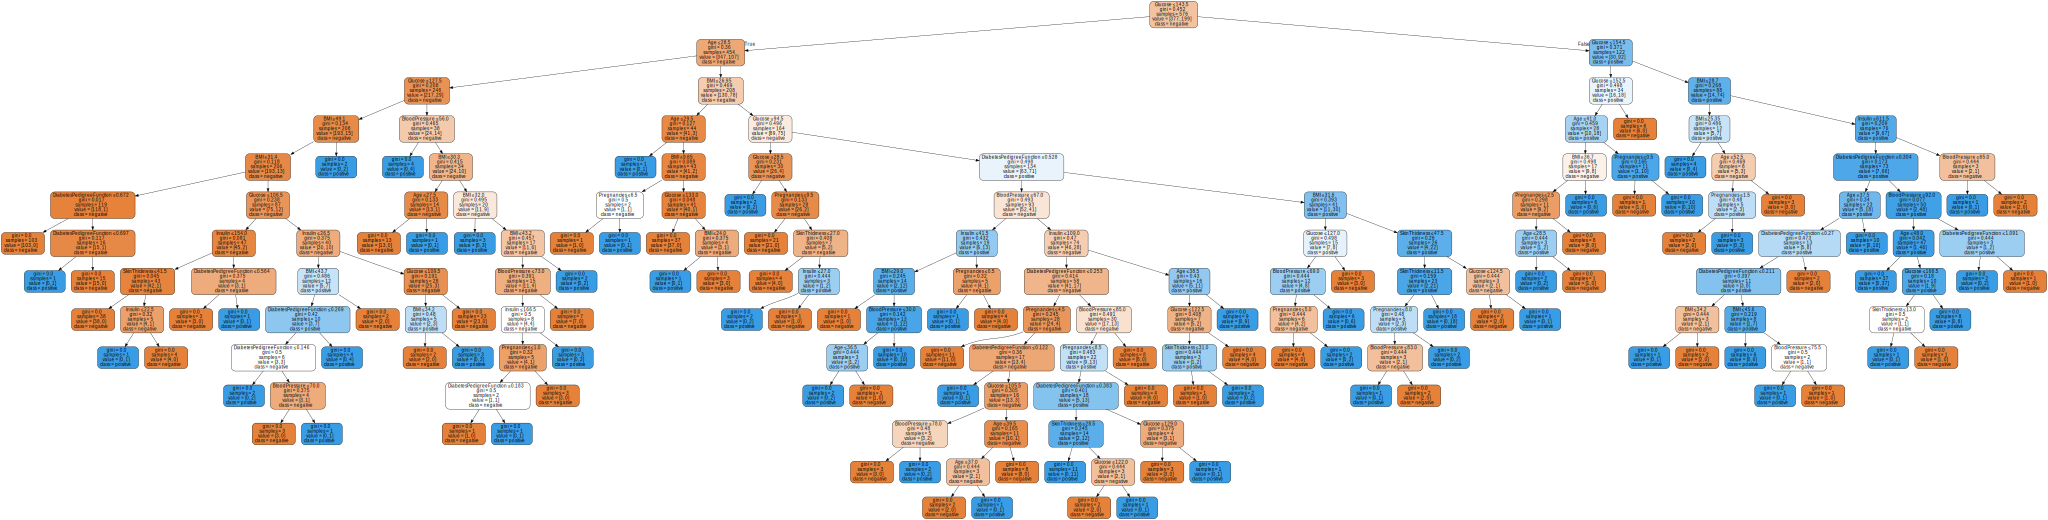

In [8]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

In [9]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)

In [11]:
graph2.write_png('../../../images/diabetes.png')

True